## KDS75

Trying to plot sea ice concentration with CC functionality

In [1]:
# Load modules
%matplotlib inline

import cosima_cookbook as cc
import matplotlib.pyplot as plt
import seaborn as sns

from netCDF4 import Dataset # to work with NetCDF files
import numpy as np
from mpl_toolkits.basemap import Basemap # plot on map projections
import xarray as xr


netcdf_index loaded.


In [2]:
from joblib import Memory

memory = Memory(cachedir='/g/data1/v45/cosima-cookbook/', verbose=0)

In [3]:
cc.start_cluster(diagnostics_port=8787)

If the link to the dashboard below doesn't work, run this command on a local terminal to set up a SSH tunnel:

  ssh -N -L 8787:127.0.0.1:8787 vdi-n20.nci.org.au -l pas561


Client Scheduler: tcp://127.0.0.1:43331 Dashboard: http://127.0.0.1:8787,Cluster Workers: 4 Cores: 8 Memory: 24.00 GB


In [4]:
#A = xr.DataArray(np.arange(100))
#A.cumsum(axis=0)
print (xr.__version__)
#my xarray version is old, no cumsum. Should be version 0.9.2 or newer?

0.10.0


In [5]:
cc.build_index()

Files found but not yet indexed: 0
No new .nc files found.


True

In [6]:
configuration = 'mom01v5'
expts = cc.get_experiments(configuration)
display(expts)


['GFDL50',
 'KDS75',
 'KDS75_PI',
 'KDS75_UP',
 'KDS75_WOA13',
 'KDS75_newbathy_CORE',
 'KDS75_newbathy_JRA',
 'KDS75_newbathy_JRA_runoff',
 'KDS75_salt10days',
 'KDS75_saltfluxes',
 'KDS75_wind',
 'kds75_cp',
 'kds75_wp2']

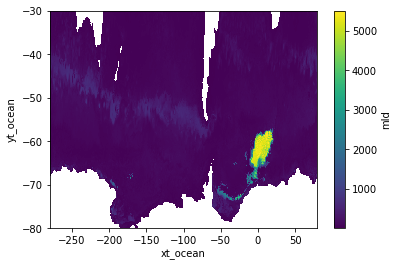

In [8]:
expt='kds75_wp2'
mld= cc.get_nc_variable(expt,
                    'ocean_month.nc',
                    'mld',
                    time_units='days since 1860-01-01',
                    use_bag=True,
                    )
#mean_mld = mld.sel(time=slice('1975-01','1975-12')).mean('time')
mean_mld = mld.sel(yt_ocean=slice(-80,-30)).sel(time='1975-09').mean('time')
#mean_mld = mld.mean('time')
mean_mld.plot.pcolormesh()

In [ ]:
#I;ve never gotten the following to complete ... kernel allways dies

pert_i=cc.get_nc_variable('kds75_wp2',
                    'ice_month.nc',
                    'CN',
                    time_units='days since 1973-04-01',
                    use_bag=True,
                    chunks={'time': 1}
                    )
septice = pert_i.sel(yt_ocean=slice(-80,-55)).sum('ct')
print(septice.shape)

In [ ]:
septice.isel(time=18).plot.pcolormesh()

In [11]:
#if i fist ncrcat the CN data into an netcdf file, it works fine and is very fast
NYFPertDir = '/g/data3/hh5/tmp/cosima/mom01v5/kds75_wp2/'

Ocean_File = os.path.join(NYFPertDir,'CN.cat.nc')
pert_i=xr.open_mfdataset(Ocean_File,engine='netcdf4',concat_dim='time',decode_times=False)
print pert_i.CN.shape
print pert_i.CN[:,:,:,:].sum('ct').shape

(87, 5, 2700, 3600)
(87, 2700, 3600)
